In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = r'C:\Users\ASUS\OneDrive\Documents\CODE\CTG\Data\ModifiedData.xlsx'
data = pd.read_excel(file_path)
data.head()

,year-month,year,month,MaCK,TyLeLai
0,2014-1,2014,1,AAA,0.318182
1,2014-2,2014,2,AAA,-0.012821
2,2014-3,2014,3,AAA,0.081818
3,2014-4,2014,4,AAA,-0.155172
4,2014-5,2014,5,AAA,0.010929


In [2]:
frequency = data["MaCK"].value_counts()
frequency

MaCK
AAA         92
PMS         92
L43         92
L61         92
L62         92
            ..
CVIC2105     1
CVIC2104     1
CMSN2104     1
CPNJ2104     1
CFPT2102     1
Name: count, Length: 1144, dtype: int64

In [3]:
# Xác định tất cả các giá trị có tần số xuất hiện lớn nhất
max_frequency_values = frequency[frequency == frequency.max()].index

# Lấy các dòng có giá trị bằng các phần tử có tần số xuất hiện lớn nhất(lấy mã CK có đủ thông tin từ 1/2014 đến 8/2021)
data = data[data['MaCK'].isin(max_frequency_values)]
# Lấy các dòng có mã chứng khoán được chọn
MaCK = ['HPG', 'HSG', 'NKG', 'MBB', 'STB', 'VCB', 'BID', 'GAS', 'PVS', 'CTG']
data = data[data['MaCK'].isin(MaCK)]

In [4]:
data["MaCK"].value_counts()

MaCK
BID    92
CTG    92
GAS    92
HPG    92
HSG    92
MBB    92
NKG    92
PVS    92
STB    92
VCB    92
Name: count, dtype: int64

In [5]:
plt.figure(figsize=(16, 8))
# AAM = data[data['MaCK'] == 'AAM']
# plt.plot(AAM['year-month'], AAM['TyLeLai'], label='AAM')
data_ck = data[:92].drop(columns=['year','month','MaCK', 'TyLeLai'])
for MaCK in data['MaCK'].unique():
    subset = data[data['MaCK'] == MaCK]
    subset.reset_index(drop=True, inplace=True)
    # print(subset.head())
    data_ck[MaCK]=subset['TyLeLai'].values

data = data_ck
with pd.ExcelWriter('filtered_data.xlsx', engine='openpyxl') as writer:
    # Lưu dữ liệu gốc vào sheet 'Data'
    data.to_excel(writer, sheet_name='Data', index=False)

    # Tạo một DataFrame tạm thời để dễ dàng ghi dữ liệu dự báo vào Excel
    write_data = data

    # Lưu dữ liệu
    write_data.to_excel(writer, sheet_name='CK', index=False)
data_ck.reset_index(drop=True, inplace=True)
data_ck

,year-month,BID,CTG,GAS,HPG,HSG,MBB,NKG,PVS,STB,VCB
0,2014-1,-0.021277,0.030488,0.157895,0.109489,0.160941,0.104000,0.204545,0.379310,0.169591,0.067416
1,2014-2,-0.034091,0.047619,0.077922,0.000000,0.182008,0.131387,0.114286,0.042553,0.014286,0.096774
2,2014-3,0.005988,-0.011696,0.018293,0.092784,0.000000,0.060000,0.194690,0.065455,-0.014851,0.033557
3,2014-4,-0.053892,-0.048193,0.198795,0.131029,-0.055238,-0.096774,-0.157895,-0.103448,0.005102,-0.073955
4,2014-5,-0.051282,0.028513,0.000528,0.055901,-0.007009,0.000000,-0.112150,0.072000,0.056701,0.070111
...,...,...,...,...,...,...,...,...,...,...,...
87,2021-4,-0.067122,-0.006090,-0.078366,0.197938,0.094828,0.039384,0.083333,-0.151899,0.106481,0.031992
88,2021-5,0.179177,0.234884,-0.008403,0.199458,0.306548,0.216000,0.198182,0.309645,0.402490,-0.005045
89,2021-6,-0.015625,0.001901,0.146199,-0.072072,0.058714,0.134817,0.058122,0.090909,-0.055556,0.122469
90,2021-7,-0.131078,-0.153200,-0.048832,-0.104167,-0.124413,-0.102072,-0.074176,-0.123675,-0.035484,-0.158076


<Figure size 1600x800 with 0 Axes>

In [6]:
data.describe()

,BID,CTG,GAS,HPG,HSG,MBB,NKG,PVS,STB,VCB
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.016766,0.016036,0.009949,0.029307,0.027058,0.023475,0.037225,0.017346,0.013797,0.021863
std,0.110319,0.101655,0.110876,0.101455,0.150794,0.084009,0.164100,0.130525,0.106643,0.083570
min,-0.316722,-0.325490,-0.306329,-0.244395,-0.400527,-0.345411,-0.469240,-0.400000,-0.408907,-0.242054
25%,-0.052614,-0.039378,-0.066641,-0.045218,-0.050110,-0.020844,-0.056421,-0.064574,-0.039594,-0.030636
50%,0.009058,0.011073,0.000000,0.018911,0.000000,0.023126,0.021605,0.001678,-0.002049,0.019293
75%,0.087479,0.060419,0.103057,0.093262,0.113231,0.069978,0.131694,0.074970,0.074118,0.073514
max,0.356589,0.294964,0.307450,0.306080,0.588559,0.256818,0.593023,0.442308,0.402490,0.264095


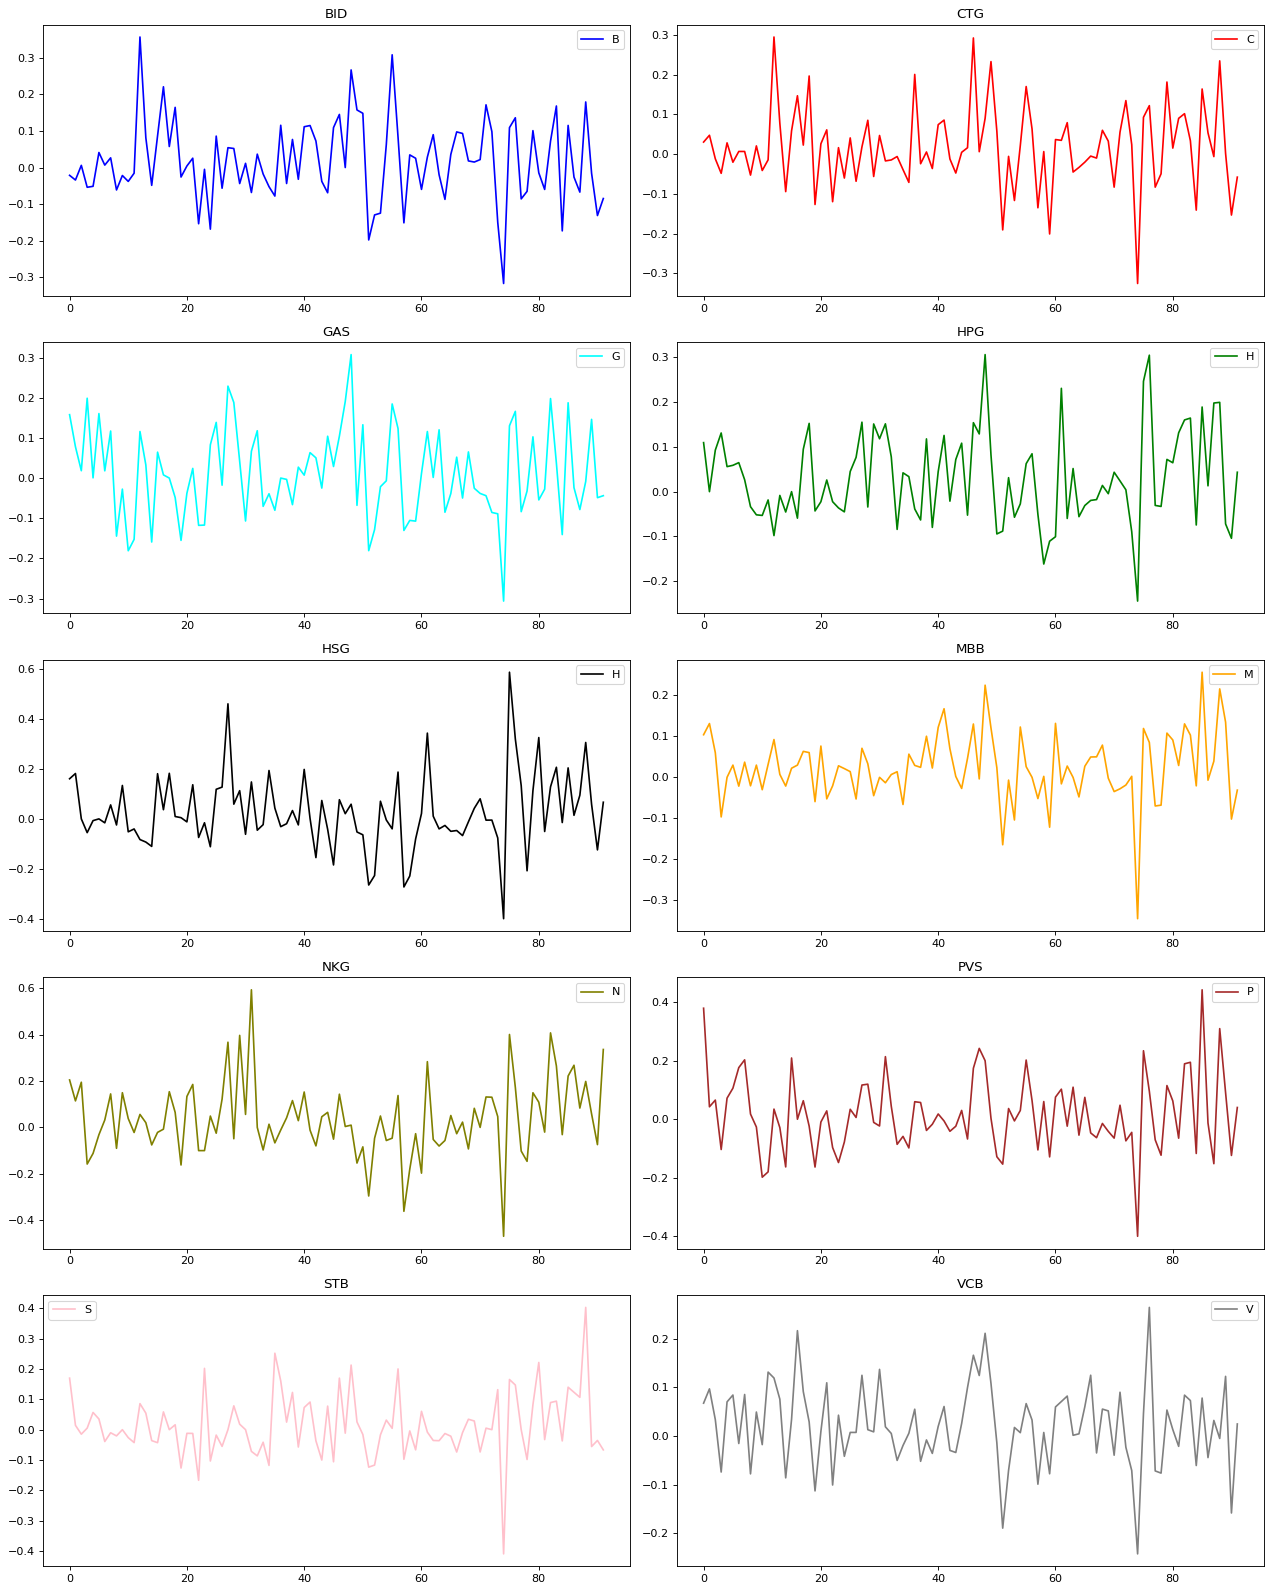

In [7]:
color_list = ['blue', 'red', 'cyan', 'green', 'black', 'orange', 'olive', 'brown', 'pink', 'gray']

def Visualize(df):
    MaCK = list(df.select_dtypes(include=[np.number]).columns.values)
    MaCK_size = len(MaCK)
    fig, axes = plt.subplots(nrows=int(np.ceil(MaCK_size/2)),ncols=2,figsize=(16,MaCK_size*2),dpi = 80,facecolor='w',edgecolor = 'k')
    for i in range(MaCK_size):
        key = MaCK[i]
        c = color_list[i % len(color_list)]
        _data = data[key]
        ax = _data.plot(ax = axes[i//2,i%2],
                         color = c,
                         title = "{}".format(key))
        ax.legend(key)
    plt.tight_layout()

Visualize(data)

In [8]:
from statsmodels.tsa.stattools import adfuller

for i in range(1,len(data.columns)):
    result = adfuller(data[data.columns[i]])

    if result[1] > 0.05:
        print("Tỷ lệ lãi của {} không là chuỗi dừng, số lag: {}".format(data.columns[i],result[2]))
    else:
        print("Tỷ lệ lãi của {} là chuỗi dừng, số lag:{}".format(data.columns[i],result[2]))

Tỷ lệ lãi của BID là chuỗi dừng, số lag:1
Tỷ lệ lãi của CTG là chuỗi dừng, số lag:1
Tỷ lệ lãi của GAS là chuỗi dừng, số lag:0
Tỷ lệ lãi của HPG là chuỗi dừng, số lag:0
Tỷ lệ lãi của HSG là chuỗi dừng, số lag:0
Tỷ lệ lãi của MBB là chuỗi dừng, số lag:0
Tỷ lệ lãi của NKG là chuỗi dừng, số lag:0
Tỷ lệ lãi của PVS là chuỗi dừng, số lag:2
Tỷ lệ lãi của STB là chuỗi dừng, số lag:0
Tỷ lệ lãi của VCB là chuỗi dừng, số lag:1


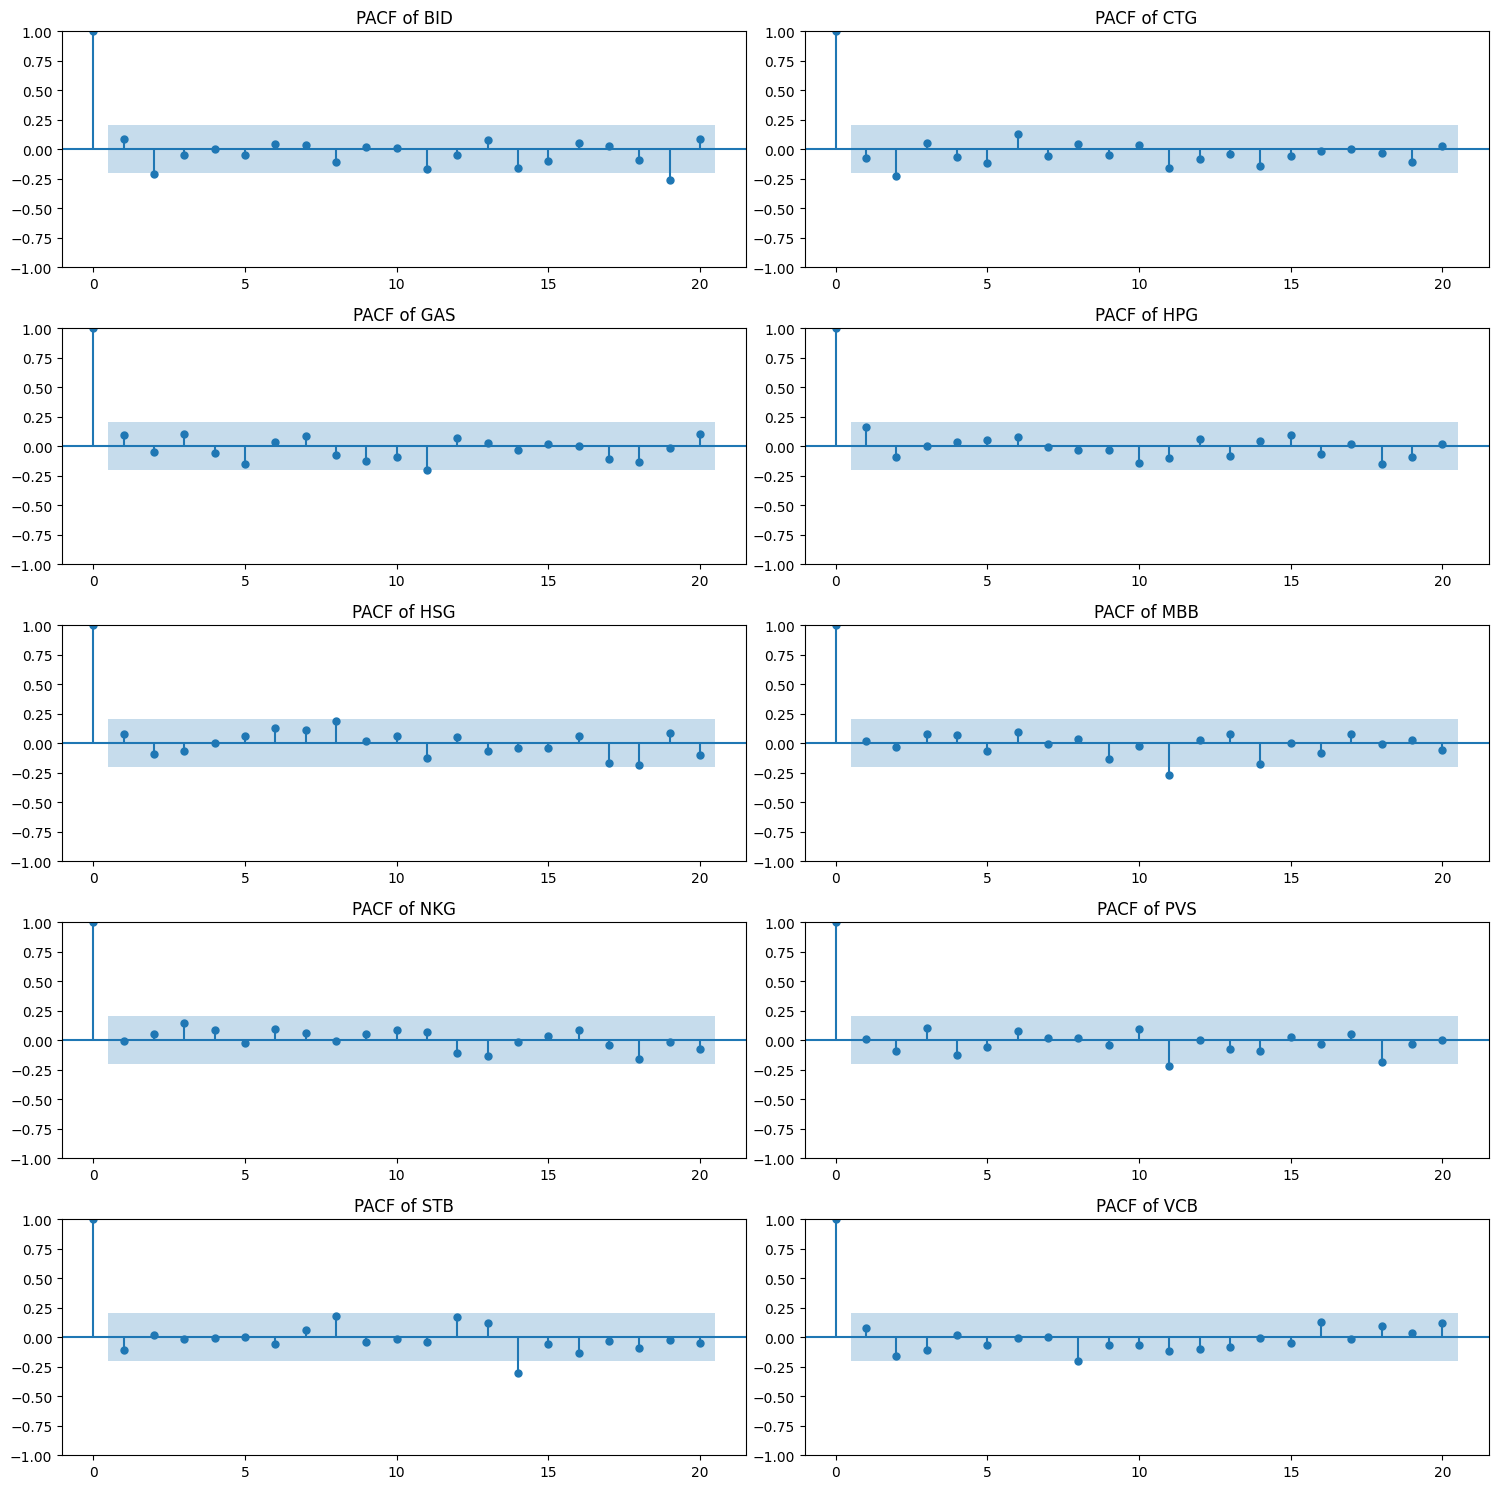

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
num_columns = len(data)
data = data.drop("year-month", axis =1)
fig, axes = plt.subplots(5, 2, figsize=(15, 3 * 5))

# Vẽ PACF cho từng chuỗi thời gian
for i, column in enumerate(data.columns):
    ax = axes[i // 2, i % 2]
    plot_pacf(data[column], lags=20, ax=ax, title=f'PACF of {column}')
plt.tight_layout()
plt.show()

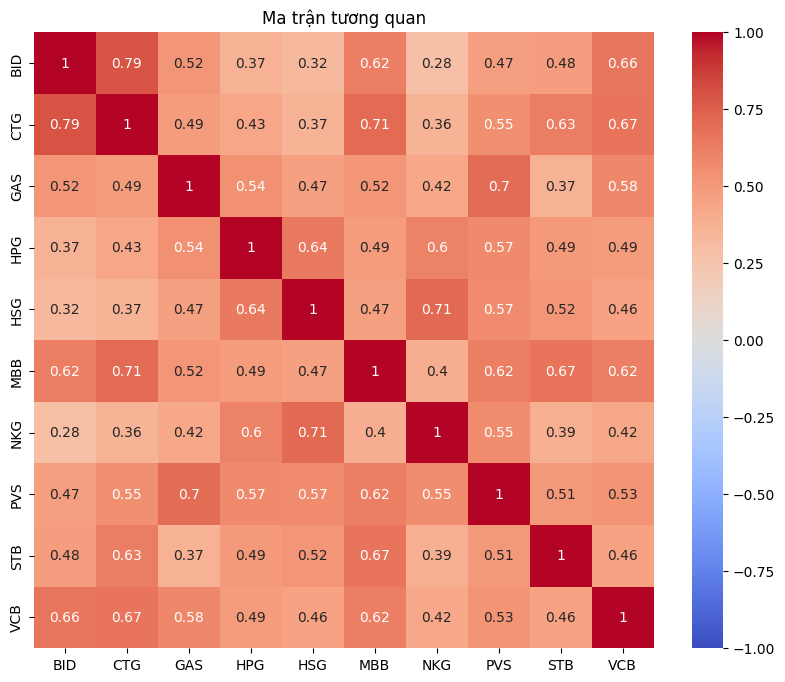

In [10]:
import seaborn as sns

# Ma trận tương quan
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan')
plt.show()


#Mô hình VAR

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -51.85     -51.52*  3.040e-23*     -51.72*
1      -50.79      -47.20   9.019e-23      -49.37
2      -50.42      -43.56   1.568e-22      -47.70
3      -49.86      -39.74   4.592e-22      -45.85
4      -49.99      -36.61   1.301e-21      -44.68
5     -52.66*      -36.02   1.163e-21      -46.07
-------------------------------------------------
5
Mean Squared Error (MSE): 0.02766319781590685
Mean Absolute Error (MAE): 0.1333054557043885
Root Mean Squared Error (RMSE): 0.1663225715767612
Symetric Mean Absolute Percentage Error (SMAPE): 72.88


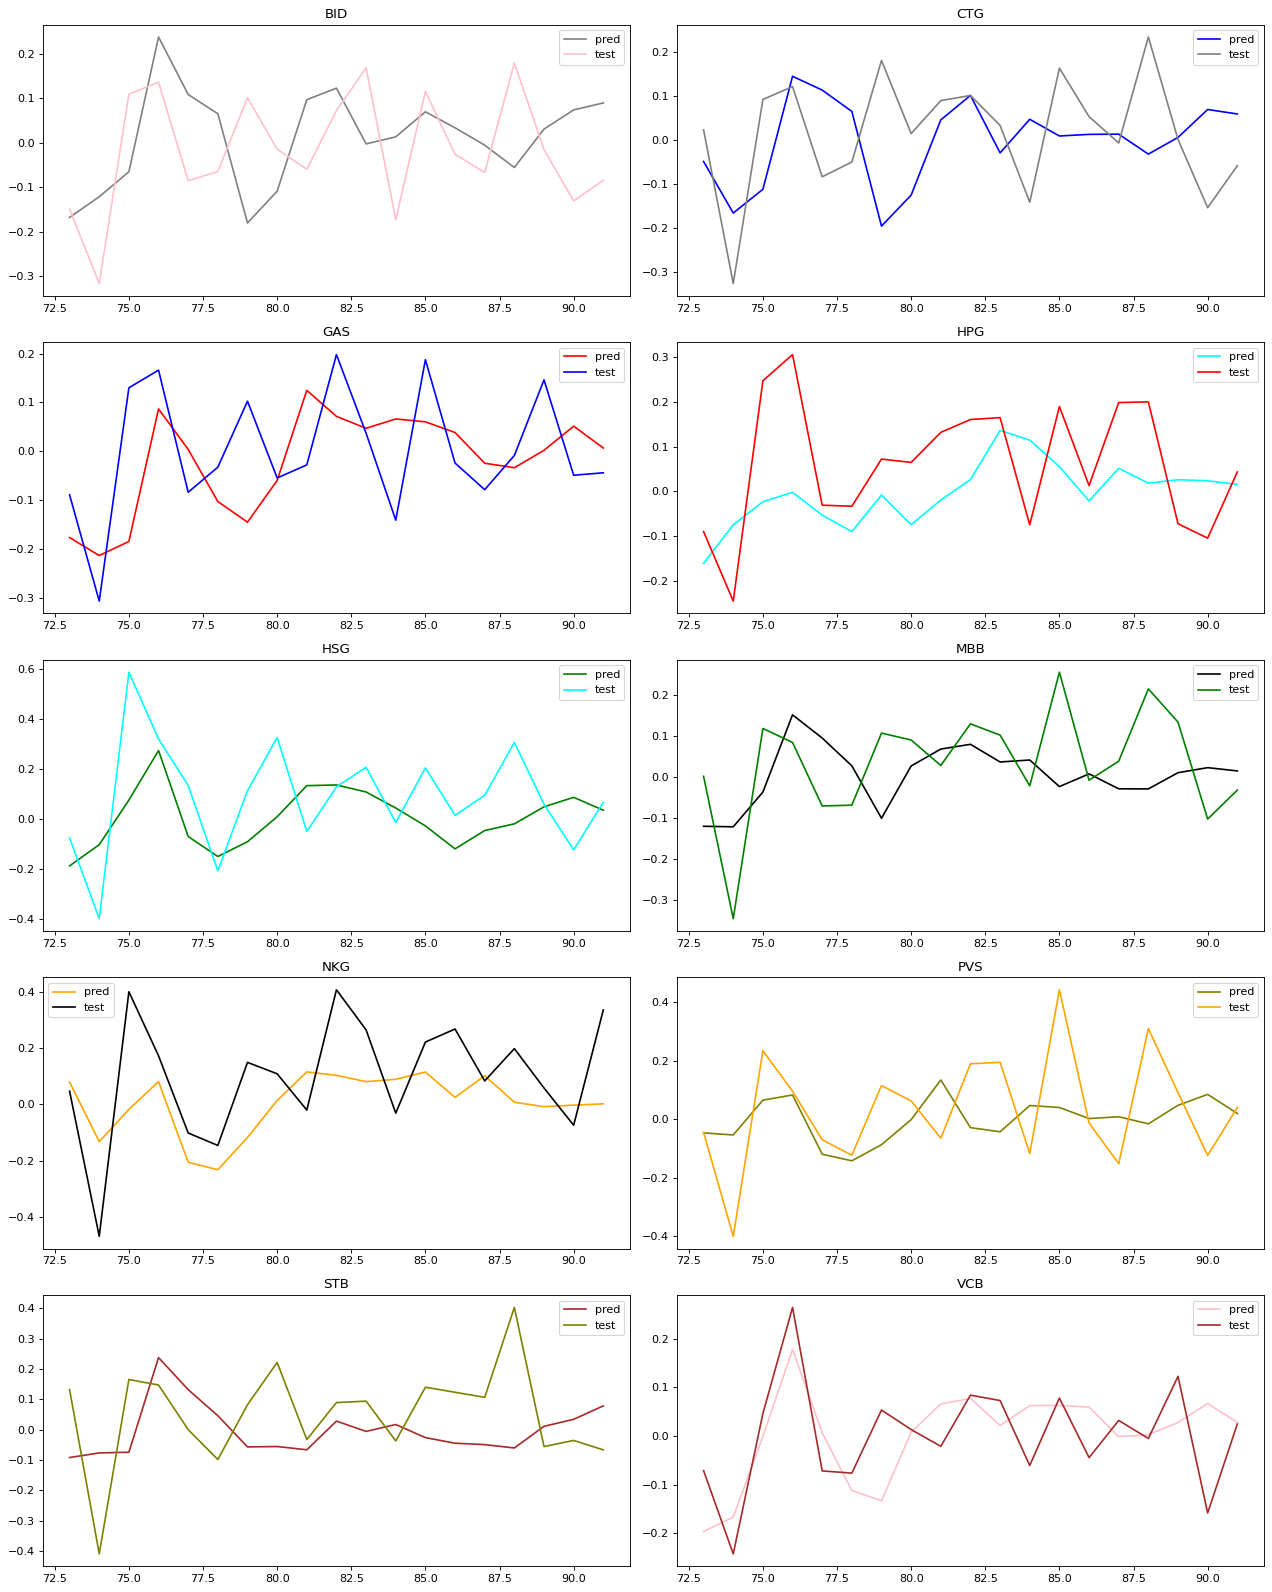

In [18]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

train_size = int(len(data) * 0.8)
train_returns, test_returns = data[:train_size], data[train_size:]
# Xây dựng mô hình VAR
model = VAR(train_returns)
lag_order = model.select_order()
print(lag_order.summary())
lag_optimal = lag_order.aic
print(lag_optimal)

model_fit = model.fit(lag_optimal)

forecast = model_fit.forecast(y=train_returns.values[-lag_optimal:], steps=len(test_returns))

def VisualizeF(df):
    MaCK = list(df.select_dtypes(include=[np.number]).columns.values)
    MaCK_size = len(MaCK)
    fig, axes = plt.subplots(nrows=int(np.ceil(MaCK_size/2)),ncols=2,figsize=(16,MaCK_size*2),dpi = 80,facecolor='w',edgecolor = 'k')
    for i in range(MaCK_size):
        key = MaCK[i]
        c = color_list[i % len(color_list)]
        c1 = color_list[i % len(color_list)-1]
        c2 = color_list[i % len(color_list)-2]
        _data = df[key]
        _data1 = train_returns[key]
        _data2 = test_returns[key]
        pred = _data.plot(ax = axes[i//2,i%2],
                         color = c1,
                         title = "{}".format(key), label = 'pred')
        # train = _data1.plot(ax = axes[i//2,i%2],
        #                  color = c,
        #                  title = "{}".format(key), label = 'train')
        test = _data2.plot(ax = axes[i//2,i%2],
                         color = c2,
                         title = "{}".format(key), label = 'test')
        pred.legend()
        # train.legend()
        test.legend()
    plt.tight_layout()

forecast_df = pd.DataFrame(forecast, index=np.arange(len(train_returns), len(train_returns)+len(test_returns)), columns=data.columns)

VisualizeF(forecast_df)

# Tính toán các tiêu chí đánh giá mô hình
def calculate_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual)))
        )*100, 2)
mse = mean_squared_error(test_returns, forecast)
mae = mean_absolute_error(test_returns, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_returns, forecast)
test_returns_= np.array(test_returns)
mape = mean_absolute_percentage_error(test_returns, forecast)
# mape = np.mean(np.abs((test_returns_ - forecast) / test_returns_)) * 100


print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Symetric Mean Absolute Percentage Error (SMAPE): {calculate_smape(test_returns,forecast)}')


         BID       CTG       GAS       HPG       HSG       MBB       NKG  \
92  0.201245  0.164193 -0.176451 -0.026800 -0.185781  0.097768 -0.277164   
93 -0.241005 -0.161647 -0.101739 -0.139633  0.152094  0.034559  0.116460   
94  0.358293  0.235508  0.420025  0.282070  0.140116  0.138482  0.329496   

         PVS       STB       VCB  
92 -0.392699  0.099000  0.079398  
93 -0.060967 -0.144311 -0.062054  
94  0.282558  0.215800  0.108962  


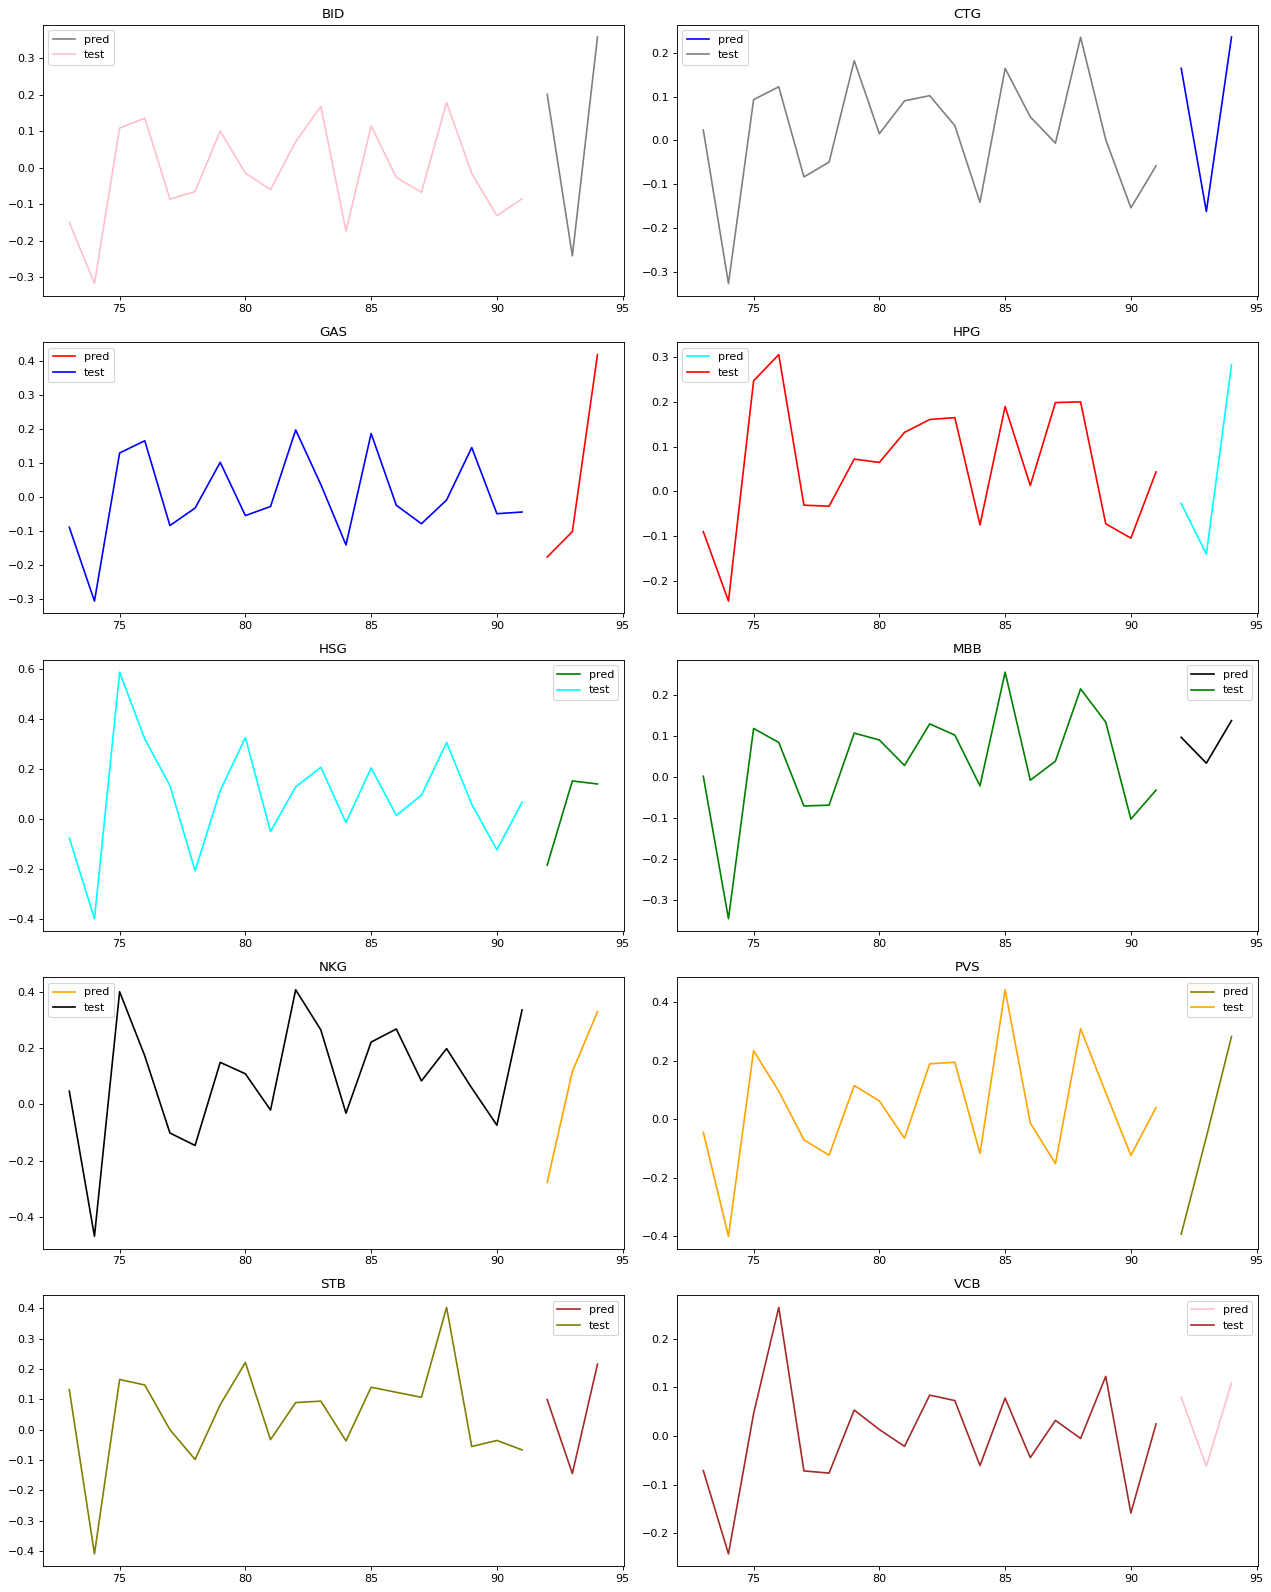

In [12]:
forecast = model_fit.forecast(y=data.values[-lag_optimal:], steps=3)
forecast_df=pd.DataFrame(forecast, index=np.arange(len(data), len(data)+3), columns=data.columns)
print(forecast_df)
VisualizeF(forecast_df)

#Mô hình CNN-GRU

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
print(len(data))


92


In [14]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
print(len(data))
# Chuyển đổi dữ liệu thành dạng phù hợp cho mô hình GRU
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), :]
        X.append(a)
        Y.append(data[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data_scaled, time_step)

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

92
(64, 10, 10)
(17, 10, 10)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, GRU, Dense

# Xây dựng mô hình CNN-GRU
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='tanh'))
model.add(MaxPooling1D(pool_size=2))

model.add(GRU(60, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(60, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(60, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(60, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.3042 - val_loss: 0.2663
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2725 - val_loss: 0.2356
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2435 - val_loss: 0.2042
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2090 - val_loss: 0.1715
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1780 - val_loss: 0.1375
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1503 - val_loss: 0.1044
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1206 - val_loss: 0.0755
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1011 - val_loss: 0.0555
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0836 - val_loss: 0.0461
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0792 - val_loss: 0.0436
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0750 - val_loss: 0.0411
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0775 - val_loss: 0.0370
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Mean Squared Error (MSE): 0.013421506775637592
Mean Absolute Error (MAE): 0.08820186792288377
Root Mean Squared Error (RMSE): 0.1158512269060522
Symmetric Mean Absolute Percentage Error (SMAPE): 65.55


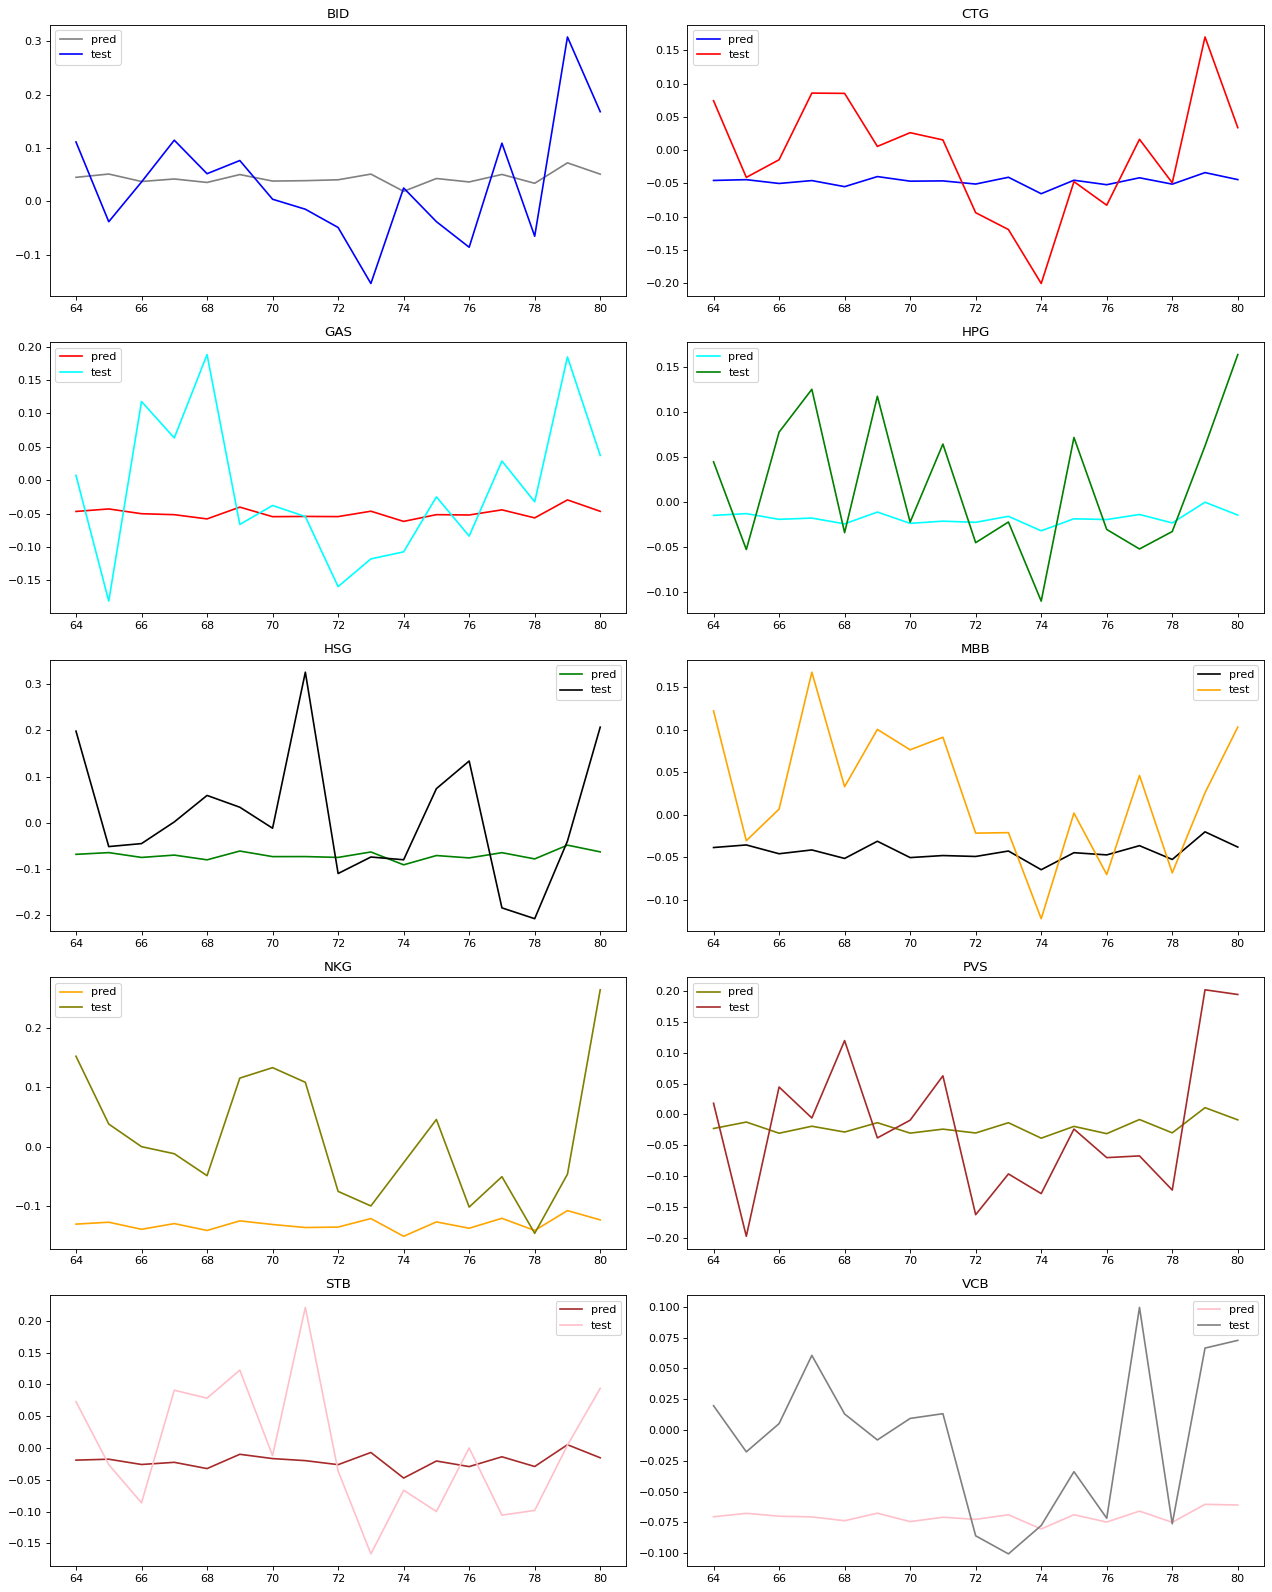

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
# Đánh giá mô hình
test_predict = model.predict(X_test)

# Chuyển đổi dữ liệu dự đoán trở lại dạng ban đầu
test_predict = scaler.inverse_transform(test_predict)

Y_test_original = scaler.inverse_transform(Y_test)
Y_test_original_df = pd.DataFrame(Y_test_original, index=np.arange(len(X_train), len(X_train)+len(X_test)), columns=data.columns)

def VisualizeG(df):
    MaCK = list(df.select_dtypes(include=[np.number]).columns.values)
    MaCK_size = len(MaCK)
    fig, axes = plt.subplots(nrows=int(np.ceil(MaCK_size/2)),ncols=2,figsize=(16,MaCK_size*2),dpi = 80,facecolor='w',edgecolor = 'k')
    for i in range(MaCK_size):
        key = MaCK[i]
        c = color_list[i % len(color_list)]
        c1 = color_list[i % len(color_list)-1]
        _data = df[key]
        _data1 = Y_test_original_df[key]
        ax = _data.plot(ax = axes[i//2,i%2],
                         color = c1,
                         title = "{}".format(key), label = 'pred')
        ax1 = _data1.plot(ax = axes[i//2,i%2],
                         color = c,
                         title = "{}".format(key), label = 'test')
        ax.legend()
        ax1.legend()
    plt.tight_layout()
# Tính toán các tiêu chí đánh giá mô hình
test_predict_df = pd.DataFrame(test_predict, index=np.arange(len(X_train), len(X_train)+len(X_test)), columns=data.columns)
VisualizeG(test_predict_df)

mse = mean_squared_error(Y_test_original, test_predict)
mae = mean_absolute_error(Y_test_original, test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_original, test_predict)
test_returns_= np.array(Y_test_original)
# mape = mean_absolute_percentage_error(Y_test_original, test_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Symmetric Mean Absolute Percentage Error (SMAPE): {calculate_smape(Y_test_original,test_predict)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
         BID       CTG       GAS       HPG       HSG       MBB       NKG  \
92  0.074164 -0.028838 -0.032509 -0.000470 -0.044735 -0.019906 -0.102995   
93  0.060228 -0.041967 -0.038309 -0.011123 -0.058009 -0.034784 -0.120228   
94  0.061046 -0.037916 -0.040502 -0.010348 -0.057340 -0.031269 -0.118805   

         PVS       STB       VCB  
92  0.012711  0.009681 -0.058977  
93 -0.001466 -0.004752 -0.063148  
94 -0.001925 -0.004428 -0.062180  


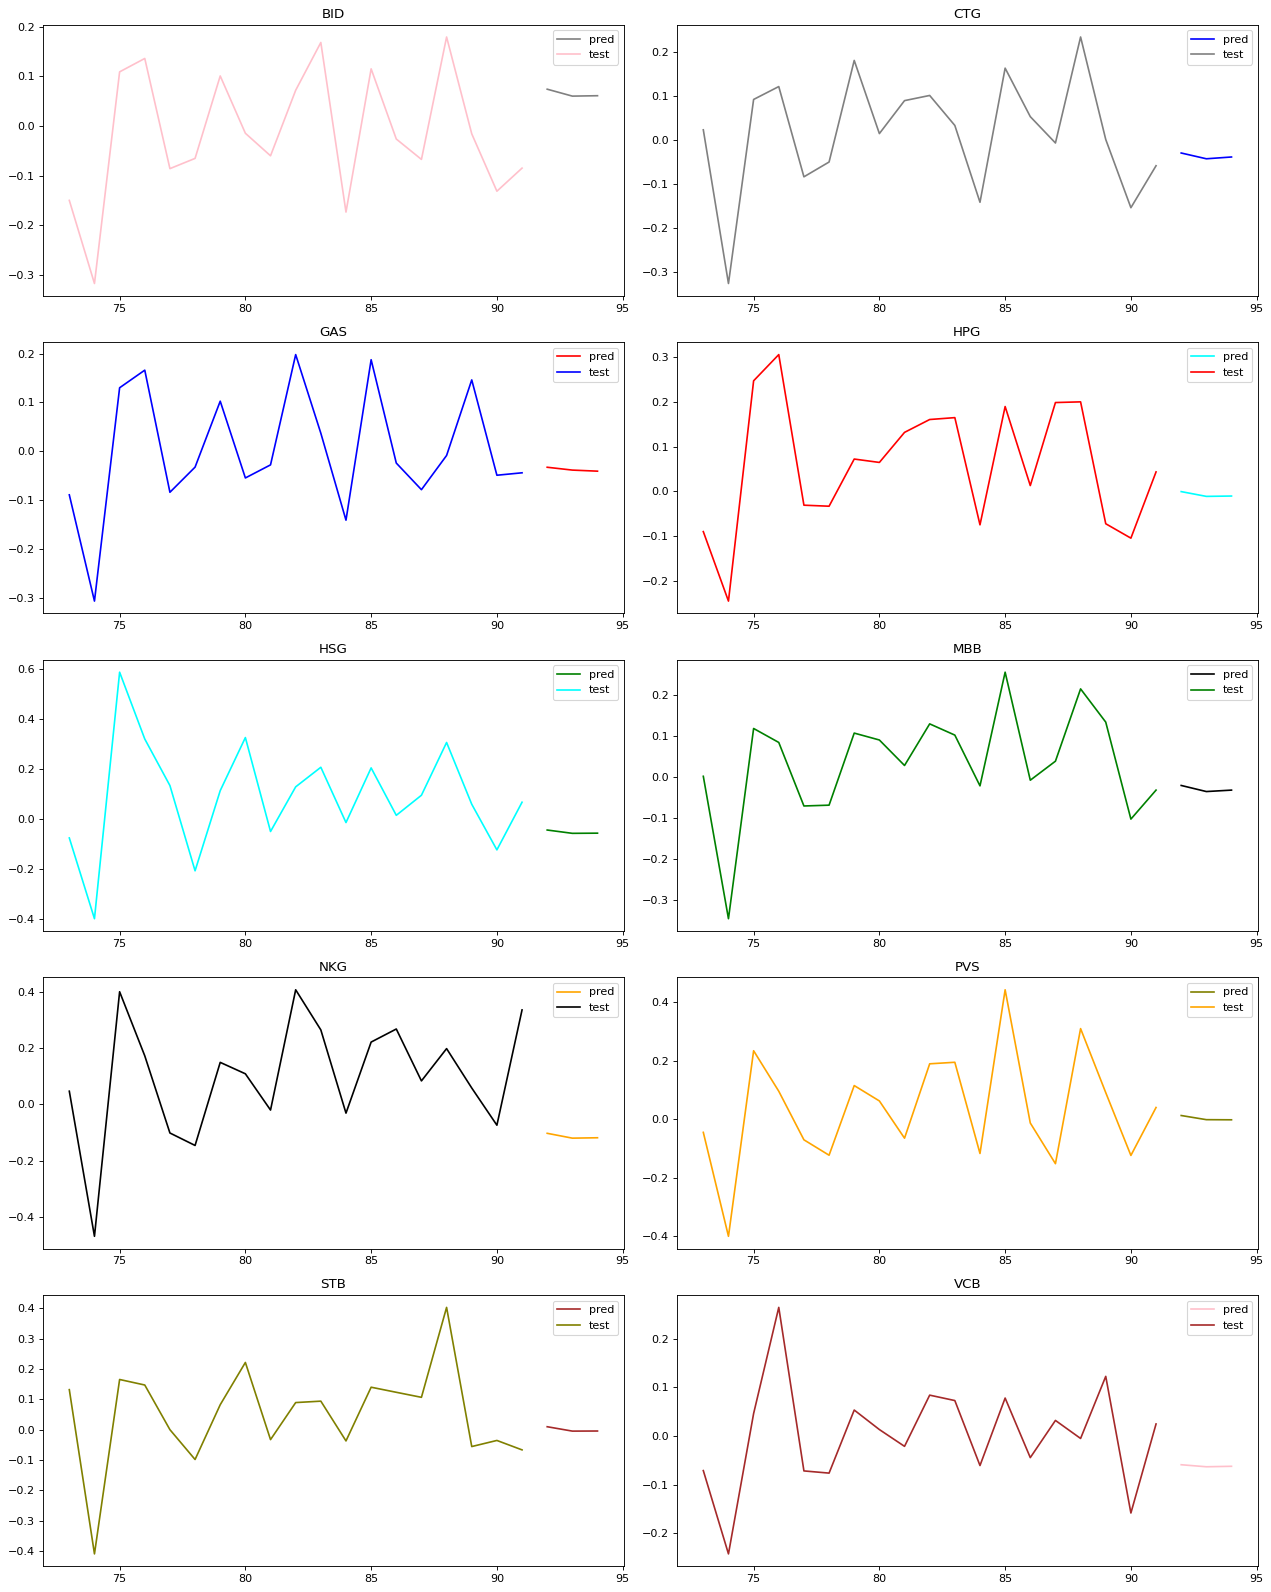

In [21]:
def predict_future(data, model, time_step, future_steps):
    predictions = []
    current_input = data[-time_step:]
    for _ in range(future_steps):
        current_input = current_input.reshape((1, time_step, data.shape[1]))
        prediction = model.predict(current_input)
        predictions.append(prediction)
        current_input = np.append(current_input[:,1:,:], prediction.reshape((1,1,data.shape[1])), axis=1)
    return np.array(predictions).reshape((future_steps, data.shape[1]))

future_steps = 3
future_predictions = predict_future(Y_train, model, time_step, future_steps)
future_predictions_original = scaler.inverse_transform(future_predictions)
future_predictions_df = pd.DataFrame(future_predictions_original, index=np.arange(len(data), len(data)+future_steps), columns=data.columns)
VisualizeF(future_predictions_df)
print(future_predictions_df)